In [1]:
import re
import os

In [2]:
file = open('label.txt', 'r')
def count_lines(file):
    lines_quantity = 0
    while True:
        buffer = file.read(1024 * 8192)
        if not buffer:
            break
        lines_quantity += buffer.count('\n')

    file.close()
    return lines_quantity

In [3]:
lines = count_lines(file)
 

In [4]:
lines # 185184 rows

172304

In [35]:
import linecache
import numpy as np

count = 0 # count how many images in wider face dataset

file_names= []
x1s = []
y1s = []
ws = []
hs = []

p1_xs=[]
p1_ys=[]
p1_visible = []

p2_xs=[]
p2_ys=[]
p2_visible = []

p3_xs=[]
p3_ys=[]
p3_visible = []

p4_xs=[]
p4_ys=[]
p4_visible = []

p5_xs=[]
p5_ys=[]
p5_visible = []

i = 1

while i <= lines:

    line = linecache.getline('label.txt', i)
    if re.search('jpg', line):
        count+=1
        position = line.index('/')
        file_name = line[position + 1: -5]
        folder_name = line[:position]

        i+=1
        # check next row
        line = linecache.getline('label.txt', i)

        while not re.search('jpg', line) and i<=lines:

            bbox_lmks = np.asarray(line.split(' ')[:-1])

            bbox = bbox_lmks[:4]
            lmks = bbox_lmks[4:].reshape(-1, 3) # 5, 3

            file_names.append(file_name)
            x1s.append(int(bbox[0]))
            y1s.append(int(bbox[1]))
            ws.append(int(bbox[2]))
            hs.append(int(bbox[3]))

            p1_xs.append(lmks[0][0])
            p1_ys.append(lmks[0][1])
            p1_visible.append(lmks[0][2])

            p2_xs.append(lmks[1][0])
            p2_ys.append(lmks[1][1])
            p2_visible.append(lmks[1][2])

            p3_xs.append(lmks[2][0])
            p3_ys.append(lmks[2][1])
            p3_visible.append(lmks[2][2])

            p4_xs.append(lmks[3][0])
            p4_ys.append(lmks[3][1])
            p4_visible.append(lmks[3][2])

            p5_xs.append(lmks[4][0])
            p5_ys.append(lmks[4][1])
            p5_visible.append(lmks[4][2])

            i += 1

            line = linecache.getline('label.txt', i)


55.219' '0.0' '371.969' '260.375' '0.0'
 '358.844' '279.125' '0.0' '344.312' '282.875' '0.0' '362.125' '287.094'
 '1.0']
['398' '283' '41' '56' '411.652' '302.388' '0.0' '431.049' '302.388' '0.0'
 '422.232' '315.79' '0.0' '416.237' '322.491' '1.0' '429.991' '322.491'
 '0.0']
['564' '273' '36' '58' '594.839' '297.424' '0.0' '595.951' '297.795' '1.0'
 '592.987' '312.616' '0.0' '584.835' '314.098' '1.0' '585.576' '314.839'
 '1.0']
['736' '290' '46' '57' '743.5' '309.071' '0.0' '762.786' '310.5' '0.0'
 '746.714' '321.571' '0.0' '744.929' '328.357' '0.0' '760.643' '330.5'
 '0.0']
['794' '345' '104' '129' '817.062' '389.5' '0.0' '853.625' '396.0' '1.0'
 '830.062' '417.938' '0.0' '815.438' '437.438' '0.0' '848.75' '442.312'
 '1.0']
['427' '46' '141' '194' '469.688' '118.125' '0.0' '534.281' '127.875'
 '0.0' '498.938' '164.438' '0.0' '469.688' '186.375' '0.0' '523.312'
 '191.25' '0.0']
['281' '244' '150' '207' '343.848' '314.634' '0.0' '404.696' '331.464'
 '0.0' '374.92' '365.125' '0.0' '321.8

In [36]:
len(x1s)

159424

In [38]:
len(file_names)

159424

In [44]:
import pandas as pd
df = pd.DataFrame({'filename':file_names, 'x1':x1s, 'y1':y1s, 'w': ws, 'h':hs, 'p1_x':p1_xs, 'p1_y':p1_ys, 'p2_x':p2_xs, 'p2_y':p2_ys, 'p3_x':p3_xs, 'p3_y':p3_ys, 'p4_x':p4_xs, 'p4_y':p4_ys, 'p5_x':p5_xs, 'p5_y':p5_ys})
df.to_csv('wider_face.csv',index=False)

In [49]:
df

,filename,x1,y1,w,h,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y
0,0_Parade_marchingband_1_849,449,330,122,149,488.906,373.643,542.089,376.442,515.031,412.83,485.174,425.893,538.357,431.491
1,0_Parade_Parade_0_904,361,98,263,339,424.143,251.656,547.134,232.571,494.121,325.875,453.83,368.286,561.978,342.839
2,0_Parade_marchingband_1_799,78,221,7,8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0_Parade_marchingband_1_799,78,238,14,17,84.188,244.607,89.527,244.491,86.973,247.857,85.116,250.643,88.482,250.643
4,0_Parade_marchingband_1_799,113,212,11,15,117.0,220.0,122.0,220.0,119.0,222.0,118.0,225.0,122.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159419,9_Press_Conference_Press_Conference_9_614,462,140,264,362,489.384,279.759,584.446,272.969,512.018,338.607,502.964,415.562,579.92,408.772
159420,9_Press_Conference_Press_Conference_9_791,362,108,214,277,414.165,215.241,516.625,229.134,459.317,274.286,414.165,312.491,492.312,319.438
159421,9_Press_Conference_Press_Conference_9_280,495,222,165,222,541.286,288.429,626.25,302.357,580.286,338.571,534.321,372.0,608.143,385.929
159422,9_Press_Conference_Press_Conference_9_131,244,46,510,614,284.638,295.045,447.429,250.357,294.214,384.42,319.75,537.634,460.196,492.946


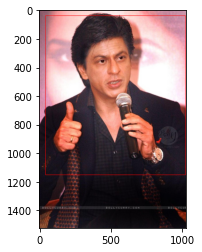

In [42]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/home/data/detection/train/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_550.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, (45, 39, 976, 1113), (255,0,0), 2)
plt.imshow(img)
plt.show()


In [37]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'